## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

In [1]:
import random

In [2]:
from sklearn.datasets import load_boston

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [58]:
def draw_rm_and_price():
    plt.scatter(X[:, 5], y)

def draw_result(k, b):
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
    draw_rm_and_price()
    plt.scatter(X_rm, price_by_random_k_and_b)

In [6]:
data = load_boston()
X, y = data['data'], data['target']

In [7]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  

In [8]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

###### 1. Random Choose Method to get optimal *k* and *b*

In [9]:
X_rm = X[:, 5]

In [10]:
def random_optimize(trying_times):
    min_loss = float('inf')
    best_k, best_b = None, None

    for i in range(trying_times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

        current_loss = loss(y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

In [64]:
random_optimize(20000)

When time is : 0, get best_k: 56.59004375086113 best_b: 80.91595676595813, and the loss is: 172576.25352792052
When time is : 1, get best_k: 36.65574027376357 best_b: -73.44741789599858, and the loss is: 18477.710380439625
When time is : 11, get best_k: 7.720584286141246 best_b: 29.21846593727048, and the loss is: 3092.321645593046
When time is : 16, get best_k: 3.1618020537724334 best_b: 27.05447426082786, and the loss is: 655.9774335178404
When time is : 34, get best_k: 17.69729079673354 best_b: -81.14079450263469, and the loss is: 136.96273943606005
When time is : 50, get best_k: 13.672858892004854 best_b: -71.4041077305511, and the loss is: 118.02180152691739
When time is : 75, get best_k: 5.643046949904118 best_b: -5.173565595963851, and the loss is: 109.6840525051926
When time is : 102, get best_k: 7.420634988442671 best_b: -20.127505341684085, and the loss is: 60.79949735394534
When time is : 1608, get best_k: 10.783595173607097 best_b: -43.34272947515072, and the loss is: 48.58

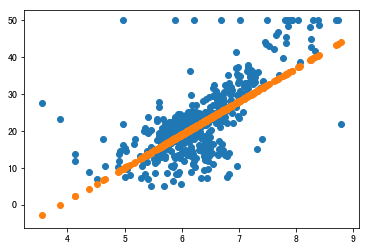

In [65]:
draw_result(9, -35)

###### 2.Supervised Direction to get optimal *k* and *b*

In [54]:
def direction_optimize(trying_times):
    min_loss = float('inf')
    best_k = random.random() * 200 - 100
    best_b = random.random() * 200 - 100
    direction = [
        (+1, -1),  # first element: k's change direction, second element: b's change direction
        (+1, +1), 
        (-1, -1), 
        (-1, +1),
    ]
    next_direction = random.choice(direction)
    scalar = 0.1
    for i in range(trying_times):
        k_direction, b_direction = next_direction
        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
        price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)
        if current_loss < min_loss: # performance became better
            min_loss = current_loss
            best_k, best_b = current_k, current_b
            next_direction = next_direction
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)

In [66]:
direction_optimize(20000)

When time is : 0, get best_k: 56.310773756678564 best_b: 33.70510872676147, and the loss is: 134414.05101561832
When time is : 1, get best_k: 56.21077375667856 best_b: 33.805108726761475, and the loss is: 134023.83638558708
When time is : 2, get best_k: 56.11077375667856 best_b: 33.905108726761476, and the loss is: 133634.1901566723
When time is : 3, get best_k: 56.01077375667856 best_b: 34.00510872676148, and the loss is: 133245.1123288739
When time is : 4, get best_k: 55.91077375667856 best_b: 34.10510872676148, and the loss is: 132856.60290219204
When time is : 5, get best_k: 55.81077375667856 best_b: 34.20510872676148, and the loss is: 132468.66187662652
When time is : 6, get best_k: 55.710773756678556 best_b: 34.30510872676148, and the loss is: 132081.28925217758
When time is : 7, get best_k: 55.610773756678554 best_b: 34.40510872676148, and the loss is: 131694.48502884508
When time is : 8, get best_k: 55.51077375667855 best_b: 34.505108726761485, and the loss is: 131308.249206629

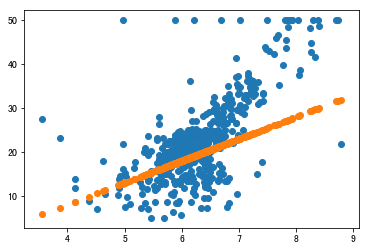

In [60]:
draw_result(5, -12)

###### 3.Gradient Descent to get optimal *k* and *b*

###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:人工无法处理过于复杂的公式，机器学习可以自动调节参数生成公式

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:优化所需次数较大，收敛慢

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:第二种方法比第一种方法好，第二种方法方向的选择是随机，随机到不对的方向产生无效计算

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:通过计算导数得到函数变化情况，使得结果更快收敛

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度即导数，下降就是沿导线减小的方向优化

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:通过计算导数使得函数不断向最优值方向变化，得到最优值所需的计算量较少

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:用计算手段，学习经验改善系统性能

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

> ans:	 广度优先遍历可以设置爬取深度，减少不需要的内容，深度优先遍历会爬取到网站以外的内容，停不下来

In [15]:
import re
import requests
from bs4 import BeautifulSoup

In [16]:
import sys
from PyQt5.QtCore import QUrl
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWebEngineWidgets import QWebEnginePage, QWebEngineView

In [17]:
# 站点坐标
location_url = 'https://map.bjsubway.com/'
# 北京地铁时间信息
time_info_url = 'http://www.bjsubway.com/e/action/ListInfo/?classid=39&ph=1'
# 北京地铁距离信息
distance_info_url = 'http://www.bjsubway.com/station/zjgls/'

In [18]:
# 站点坐标: {name: (x, y)}
location_map = {}
# 两站之间连接的信息: {hash(name1)+hash(name2):Connection}
p2p_map = {}
# 与相邻站的连接: {name:{next1, next2, ...}}
connection_map = {}

In [19]:
class Render(QWebEngineView):
    """
    PyQt爬取地铁地图
    """
    def __init__(self, url):
        self.app = QApplication(sys.argv)
        QWebEngineView.__init__(self)
        self.loadFinished.connect(self._loadFinished)
        self.load(QUrl(url))
        self.app.exec_()
    
    def _loadFinished(self, result):
        # This is an async call, you need to wait for this
        # to be called before closing the app
        self.page().toHtml(self.callable)
    
    def callable(self, data):
        self.html = data
        # Data has been stored, it's safe to quit the app
        self.app.quit()
        

def get_hash(name1, name2):
    return hash(name1) + hash(name2)

class Connection:
    """
    两站之间连接的信息
    name1: 第一站名称
    name2: 第二站名称
    diff_time: 两站之间所需时间，分钟
    distance: 两站之间的距离，米
    """

    def __init__(self, name1, name2):
        self.name1 = name1
        self.name2 = name2
        self.diff_time = None
        self.distance = None

    def __hash__(self):
        return get_hash(self.name1, self.name2)

    def __str__(self):
        return "{}-{}:{},{}".format(self.name1, self.name2, self.diff_time, self.distance)

    def __eq__(self, other):
        return self.__hash__() == other.hash()

    def hash(self):
        return self.__hash__()

    def next(self, name):
        if name == self.name1:
            return self.name2
        else:
            return self.name1


def add_connection(name1, name2):
    if name1 in connection_map:
        connection_map[name1].add(name2)
    else:
        connection_map[name1] = {name2}


def get_connection(name1, name2):
    key = get_hash(name1, name2)
    if key in p2p_map:
        return p2p_map[key]
    else:
        return None
        

def parse_time_table(table_data):
    """
    解析站间时间
    """
    def parse_time(string):
        split = string.split(':')
        if len(split) == 2:
            return int(split[0]) * 60 + int(split[1])
        else:
            return None

    def build_time_connection(row1, row2):
        if len(row1) != len(row2):
            return
        name = row1[0]
        next_name = row2[0]
        diff_time = None
        for j in range(1, min(len(row1), len(row2))):
            time = parse_time(row1[j])
            next_time = parse_time(row2[j])
            if time and next_time:
                diff_time = abs(time - next_time)
                break
        conn = Connection(name, next_name)
        if conn.hash() in p2p_map:
            p2p_map[conn.hash()].diff_time = diff_time
        else:
            conn.diff_time = diff_time
            p2p_map[conn.hash()] = conn
        add_connection(conn.name1, conn.name2)
        add_connection(conn.name2, conn.name1)

    for i, row in enumerate(table_data):
        if i > 0:
            build_time_connection(row, table_data[i - 1])
        if i < len(table_data) - 1:
            build_time_connection(row, table_data[i + 1])


def init_connection_time():
    """
    获取站间时间信息
    """
    response = requests.get(time_info_url)
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    for table in tables:
        table_data = []
        for tr in table.find_all('tr'):
            row = []
            for td in tr.find_all(['th', 'td']):
                text = td.getText().strip()
                if text == '生物医院基地': # 4号线名称标错了
                    text = '生物医药基地'
                row.append(text)
            table_data.append(row)
        print("parse:", table_data[0])
        parse_time_table(table_data[3:])


def parse_distance_table(table_data):
    """
    解析站间的距离
    """
    for row in table_data:
        split = row[0].split('――')
        name1 = split[0]
        name2 = split[1]
        distance = int(row[1])
        conn = Connection(name1, name2)
        if conn.hash() in p2p_map:
            p2p_map[conn.hash()].distance = distance
        else:
            conn.distance = distance
            p2p_map[conn.hash()] = conn
        add_connection(conn.name1, conn.name2)
        add_connection(conn.name2, conn.name1)


def init_connection_distance():
    """
    获取站间距离信息
    """
    response = requests.get(distance_info_url)
    response.encoding = 'gb2312'
    soup = BeautifulSoup(response.text, 'html.parser')
    tables = soup.find_all('table')
    for table in tables:
        table_data = []
        for tr in table.find_all('tr'):
            row = []
            for td in tr.find_all(['th', 'td']):
                row.append(td.getText().strip())
            table_data.append(row)
        print("parse:", table_data[0])
        parse_distance_table([row[:2] for row in table_data[2:]])


def init_location():
    r = Render(location_url)
    soup = BeautifulSoup(r.html, 'html.parser')
    g = soup.find(id='SvgjsG1008')
    for i in g.select('circle[sdata]'):    # 换乘站
        name = i.attrs['sdata']
        if name == '2号航站楼': name = 'T2航站楼'
        if name == '3号航站楼': name = 'T3航站楼'
        location_map[name] = (float(i.attrs['cx']), float(i.attrs['cy']))
    for i in g.select('image[sdata]'):
        location_map[i.attrs['sdata']] = (float(i.attrs['x']), float(i.attrs['y']))
    # 如果地图上没有则去相连站点的位置中点
    for name, conns in connection_map.items():
        if name in location_map: continue
        xs = []
        ys = []
        for conn in conns:
            xs.append(location_map[conn][0])
            ys.append(location_map[conn][1])
        location_map[name] = (sum(xs)/len(xs), sum(ys)/len(ys))
    

In [20]:
# 初始化时间信息
init_connection_time()

parse: ['1号线首末车时刻表']
parse: ['2号线首末车时刻表']
parse: ['4号线/大兴线首末车时刻表']
parse: ['5号线首末车时刻表']
parse: ['6号线首末车时刻表']
parse: ['7号线首末车时刻表']
parse: ['8号线（北段）首末车时刻表']
parse: ['8号线（南段）首末车时刻表']
parse: ['9号线首末车时刻表']
parse: ['10号线首末车时刻表']
parse: ['13号线首末车时刻表']
parse: ['14号线（西段）首末车时刻表']
parse: ['14号线东段（含中段）首末车时刻表']
parse: ['15号线首末车时刻表']
parse: ['16号线首末车时刻表']
parse: ['八通线首末车时刻表']
parse: ['昌平线首末车时刻表']
parse: ['亦庄线首末车时刻表']
parse: ['4号线/大兴线首末车时刻表']
parse: ['房山线首末车时刻表']
parse: ['S1线首末车时刻表']
parse: ['燕房线首末车时刻表']


In [21]:
# 初始化距离信息
init_connection_distance()

parse: ['1号线相邻站间距信息统计表']
parse: ['2号线相邻站间距信息统计表']
parse: ['4号线相邻站间距信息统计表']
parse: ['5号线相邻站间距信息统计表']
parse: ['6号线相邻站间距信息统计表']
parse: ['7号线相邻站间距信息统计表']
parse: ['8号线相邻站间距信息统计表']
parse: ['9号线相邻站间距信息统计表']
parse: ['10号线相邻站间距信息统计表']
parse: ['13号线相邻站间距信息统计表']
parse: ['14号线(西段)相邻站间距信息统计表']
parse: ['14号线（东段）相邻站间距信息统计表']
parse: ['15号线相邻站间距信息统计表']
parse: ['八通线相邻站间距信息统计表']
parse: ['昌平线相邻站间距信息统计表']
parse: ['亦庄线相邻站间距信息统计表']
parse: ['大兴线相邻站间距信息统计表']
parse: ['房山线相邻站间距信息统计表']
parse: ['机场线相邻站间距信息统计表']


In [22]:
# 初始化坐标
init_location()

In [23]:
location_map

{'苹果园': (280.0, 760.0),
 '古城': (310.0, 790.0),
 '八角游乐园': (363.0, 790.0),
 '八宝山': (407.0, 790.0),
 '玉泉路': (448.0, 790.0),
 '五棵松': (488.0, 790.0),
 '万寿路': (533.0, 790.0),
 '木樨地': (688.0, 790.0),
 '南礼士路': (733.0, 790.0),
 '天安门西': (922.0, 790.0),
 '天安门东': (979.0, 790.0),
 '王府井': (1034.0, 790.0),
 '永安里': (1184.0, 790.0),
 '积水潭': (851.0, 632.0),
 '安定门': (1007.0, 632.0),
 '东四十条': (1134.0, 698.0),
 '北京站': (1128.0, 836.0),
 '前门': (951.0, 841.0),
 '和平门': (904.0, 841.0),
 '长椿街': (787.0, 833.0),
 '阜成门': (783.0, 750.0),
 '安河桥北': (457.0, 410.0),
 '北宫门': (516.0, 410.0),
 '圆明园': (628.0, 438.0),
 '北京大学东门': (628.0, 472.0),
 '中关村': (628.0, 500.0),
 '人民大学': (628.0, 587.0),
 '魏公村': (628.0, 626.0),
 '动物园': (710.0, 660.0),
 '新街口': (848.0, 660.0),
 '西四': (862.0, 738.0),
 '灵境胡同': (862.0, 760.0),
 '陶然亭': (862.0, 896.0),
 '马家堡': (862.0, 950.0),
 '公益西桥': (862.0, 1005.0),
 '新宫': (848.0, 1023.0),
 '西红门': (833.0, 1040.0),
 '高米店北': (833.0, 1060.0),
 '高米店南': (833.0, 1082.0),
 '枣园': (833.0, 1101.0),
 '清源路': (833.0, 112

In [24]:
for k, v in p2p_map.items():
    print(k, v)

-6145486609822259454 苹果园-古城:12,2606
98947379441379683 古城-八角游乐园:3,1921
5135965015684587167 八角游乐园-八宝山:3,1953
-4047886983901215882 八宝山-玉泉路:2,1479
-11808706232187931201 玉泉路-五棵松:3,1810
-2262292677460578724 五棵松-万寿路:3,1778
4290208995467573446 万寿路-公主坟:2,1313
1137269619069852429 公主坟-军事博物馆:3,1172
5676286491145925927 军事博物馆-木樨地:2,1166
13073053831654956979 木樨地-南礼士路:2,1291
5692789165217462218 南礼士路-复兴门:6,424
9132020378443821301 复兴门-西单:2,1590
14609086626363717125 西单-天安门西:2,1217
8774440520056228519 天安门西-天安门东:2,925
-4622565905598400244 天安门东-王府井:2,852
-5125350540171622254 王府井-东单:2,774
6308835364337657114 东单-建国门:3,1230
4350540890025144058 建国门-永安里:2,1377
5557981471040836947 永安里-国贸:2,790
5635637287840582767 国贸-大望路:3,1385
1857099765695090023 大望路-四惠:3,1673
1985425718200129815 四惠-四惠东:2,1715
4882412432537689001 西直门-积水潭:25,1899
-6047774702280740302 积水潭-鼓楼大街:3,1766
-6536798756779562864 鼓楼大街-安定门:3,1237
5660797357636422242 安定门-雍和宫:1,794
6087667674969389879 雍和宫-东直门:4,2228
-8694839302405169593 东直门-东四十条:2,824
-1489330

In [25]:
connection_map

{'苹果园': {'古城', '杨庄', '金安桥'},
 '古城': {'八角游乐园', '苹果园'},
 '八角游乐园': {'八宝山', '古城'},
 '八宝山': {'八角游乐园', '玉泉路'},
 '玉泉路': {'五棵松', '八宝山'},
 '五棵松': {'万寿路', '玉泉路'},
 '万寿路': {'五棵松', '公主坟'},
 '公主坟': {'万寿路', '军事博物馆', '莲花桥', '西钓鱼台'},
 '军事博物馆': {'公主坟', '北京西站', '木樨地', '白堆子'},
 '木樨地': {'军事博物馆', '南礼士路'},
 '南礼士路': {'复兴门', '木樨地'},
 '复兴门': {'南礼士路', '西单', '长椿街', '阜成门'},
 '西单': {'复兴门', '天安门西', '宣武门', '灵境胡同'},
 '天安门西': {'天安门东', '西单'},
 '天安门东': {'天安门西', '王府井'},
 '王府井': {'东单', '天安门东'},
 '东单': {'崇文门', '建国门', '灯市口', '王府井'},
 '建国门': {'东单', '北京站', '朝阳门', '永安里'},
 '永安里': {'国贸', '建国门'},
 '国贸': {'双井', '大望路', '永安里', '金台夕照'},
 '大望路': {'九龙山', '四惠', '国贸', '红庙', '金台路'},
 '四惠': {'四惠东', '大望路'},
 '四惠东': {'四惠', '高碑店'},
 '西直门': {'动物园', '大钟寺', '新街口', '积水潭', '车公庄'},
 '积水潭': {'西直门', '鼓楼大街'},
 '鼓楼大街': {'什刹海', '安定门', '安德里北街', '积水潭'},
 '安定门': {'雍和宫', '鼓楼大街'},
 '雍和宫': {'东直门', '北新桥', '和平里北街', '安定门'},
 '东直门': {'三元桥', '东四十条', '柳芳', '雍和宫'},
 '东四十条': {'东直门', '朝阳门'},
 '朝阳门': {'东四', '东四十条', '东大桥', '建国门'},
 '北京站': {'崇文门', '建国门'},
 '崇文门': {'东单',

In [26]:
for k, v in connection_map.items():
    if k not in location_map:
        print(k, v)

In [27]:
location_map['公主坟']

(582.0, 783.0)

In [28]:
location_map['军事博物馆']

(621.0, 783.0)

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [29]:
import networkx as nx

In [30]:
%matplotlib inline

In [31]:
import matplotlib.pyplot as plt

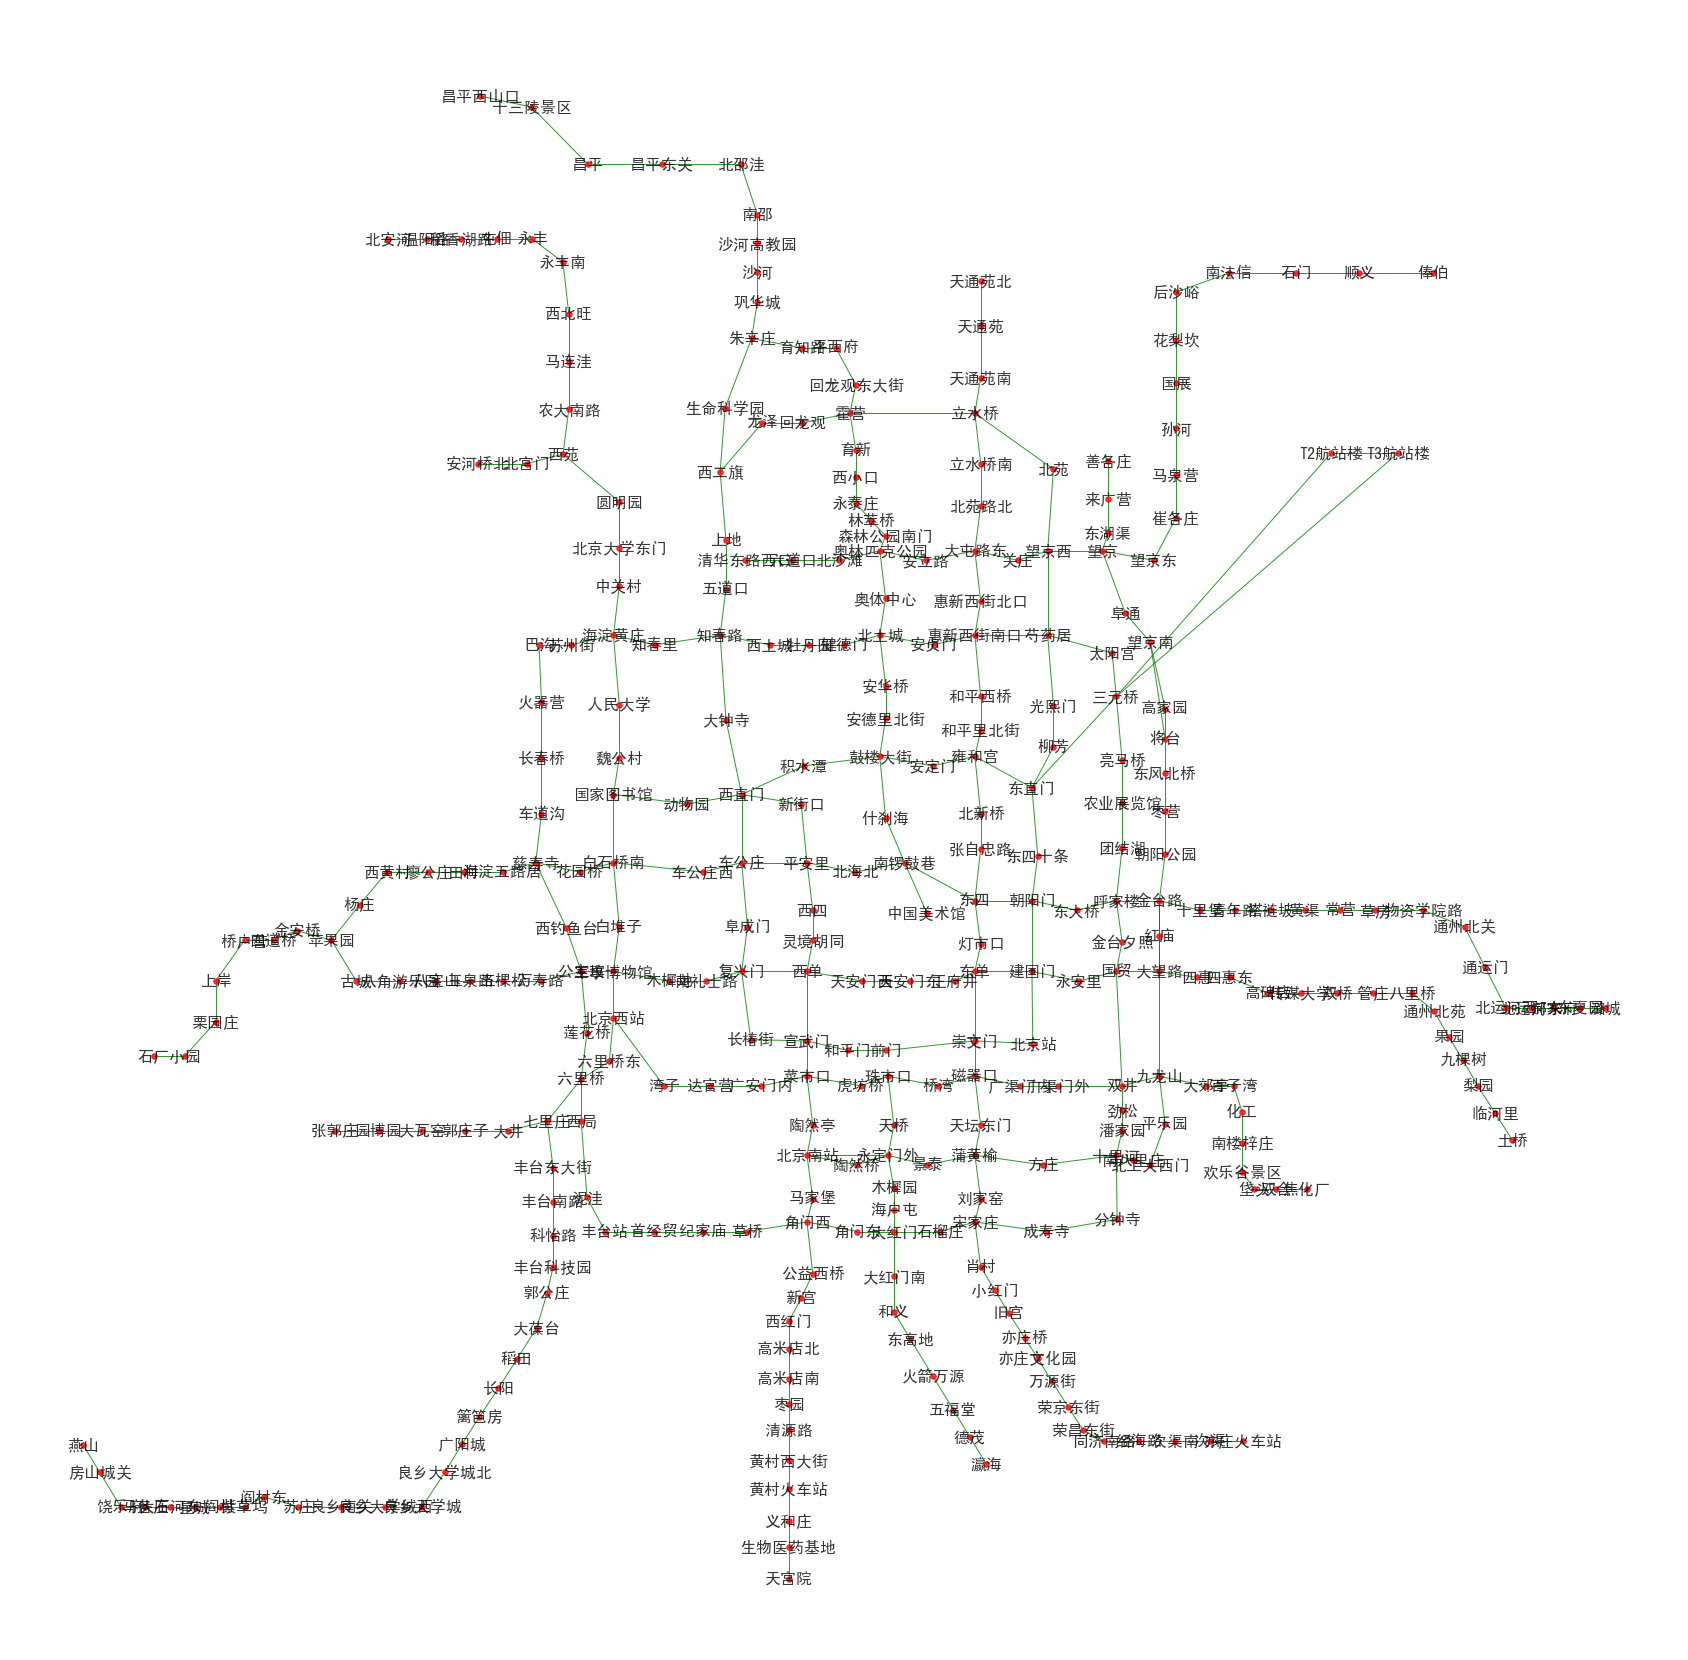

In [32]:
# 绘制站点连接图
G = nx.Graph(connection_map)
# 设置画布大小
plt.figure(figsize=(30,30))
# 设置坐标原点在左上角
ax = plt.gca()                       #获取到当前坐标轴信息
ax.xaxis.set_ticks_position('top')   #将X坐标轴移到上面
ax.invert_yaxis()                    #反转Y坐标轴
nx.draw(G,location_map,with_labels=True,font_size=16, node_size=30,node_color = 'r',edge_color='g',alpha=0.8)

In [33]:
import math

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [34]:
def search(start, destination, connection_grpah, sort_candidate):
    """
    广度优先搜索，获取最优路径
    """
    pathes = [[start]]
    visitied = set()
    while pathes: 
        path = pathes.pop(0)
        froninter = path[-1]     
        if froninter in visitied: continue          
        successors = connection_grpah[froninter]       
        for city in successors:
            if city in path: continue  
            new_path = path + [city]        
            pathes.append(new_path)
            if city == destination: return new_path
        visitied.add(froninter)
        pathes = sort_candidate(pathes) 

In [35]:
def transfer_stations_first(pathes): 
    """
    最少换乘优先
    """
    return sorted(pathes, key=len)

In [36]:
# 计算平均时间
diff_time_list = [c.diff_time for c in p2p_map.values() if c.diff_time]
avg_diff_time = round(sum(diff_time_list) / len(diff_time_list), 0)
def transfer_time_fisrt(pathes):
    """
    最短时间优先
    """
    if len(pathes) <= 1:
        return pathes

    def sum_time(path):
        time = 0
        for i in range(len(path) - 1):
            conn = get_connection(path[i], path[i + 1])
            if conn.diff_time:
                time += conn.diff_time
            else:
                time += avg_diff_time  # 没有时间则使用平均时间
        return time

    return sorted(pathes, key=sum_time)

In [37]:
# 计算平均距离
distance_list = [c.distance for c in p2p_map.values() if c.distance]
avg_distance = round(sum(distance_list) / len(distance_list), 0)
def transfer_distance_fisrt(pathes):
    """
    最短距离优先
    """
    if len(pathes) <= 1:
        return pathes

    def sum_distance(path):
        distance = 0
        for i in range(len(path) - 1):
            conn = get_connection(path[i], path[i + 1])
            if conn.distance:
                distance += conn.distance
            else:
                distance += avg_distance  # 没有距离则使用平均距离
        return distance

    return sorted(pathes, key=sum_distance)

In [38]:
search('西直门', '国贸', connection_map, sort_candidate=transfer_stations_first)

['西直门', '新街口', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '建国门', '永安里', '国贸']

In [39]:
search('西直门', '国贸', connection_map, sort_candidate=transfer_time_fisrt)

['西直门', '新街口', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '建国门', '永安里', '国贸']

In [40]:
search('西直门', '国贸', connection_map, sort_candidate=transfer_distance_fisrt)

['西直门', '新街口', '平安里', '北海北', '南锣鼓巷', '东四', '灯市口', '东单', '建国门', '永安里', '国贸']

## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)